# Using Numpy for Data Generation

In [2]:
# for generating arrays of pseudorandom numbers
import numpy as np

In [5]:
# ensures identical random numbers every time the notebook is run
np.random.seed(42)

In [6]:
# random 1D array
x = np.arange(5)
y = np.arange(start=1, stop=10, step=2)

array([0, 1, 2, 3, 4])

In [9]:
# random 2D array
np.random.randint(low=0, high=10, size=(3,4))

array([[0, 1, 8, 3],
       [8, 5, 6, 8],
       [9, 9, 6, 5]])

In [16]:
# transpose and batch 1D arrays
x = np.arange(1, 9)
y = np.arange(11, 19)
p = np.arange(21, 29)
q = np.arange(31, 39)

z = np.column_stack((x, y, p, q))
print(z)

[[ 1 11 21 31]
 [ 2 12 22 32]
 [ 3 13 23 33]
 [ 4 14 24 34]
 [ 5 15 25 35]
 [ 6 16 26 36]
 [ 7 17 27 37]
 [ 8 18 28 38]]


In [24]:
# reshape array
x = np.arange(8)
print(x)

y = x.reshape(4,2)
print(y)

z = x.reshape(2,4)
print(z)

[0 1 2 3 4 5 6 7]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]


In [26]:
# transpose array
x = np.random.randint(0, 9, (2, 3))
print(x)

y = x.T
print(y)

[[3 3 2]
 [6 5 4]]
[[3 6]
 [3 5]
 [2 4]]


In [27]:
# create diagonal array
x = np.diag([1, 2, 3])
print(x)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


# Using Pyplot for Data Visualization

In [144]:
# magic jupyter function for inline display of graphics
%matplotlib inline

import matplotlib.pyplot as plt

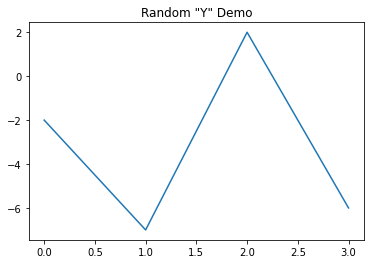

In [46]:
# pyplot is matplotlib stateful interface
plt.title('Random "Y" Demo')
plt.plot(np.arange(4), np.random.randint(-9, 9, (4,)))

In [99]:
# Use subplots method for access to axes objects
# ----------------------------------------------
# figure, axes = plt.subplots()
# 
# figure = plt.figure()

## Stack Plot

In [69]:
_range = np.arange(20)
_random = np.random.randint(0, 10, size=(3, _range.size))

years = 1990 + _range
growth = _range + _random

start_year, end_year = years[0], years[-1]

print(growth[0])

[ 6 10  7  9  8 11 12 16 10 13 13 15 17 22 22 16 16 18 26 26]


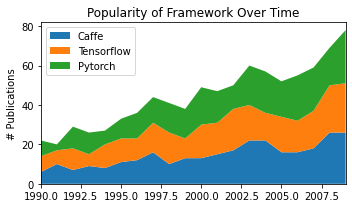

In [70]:
figure, axes = plt.subplots(figsize=(5,3))

axes.stackplot(years, growth, labels=['Caffe', 'Tensorflow', 'Pytorch'])
axes.set_title('Popularity of Framework Over Time')
axes.legend(loc='upper left')
axes.set_ylabel('# Publications')
axes.set_xlim(xmin=start_year, xmax=end_year)

figure.tight_layout()
# use plt.show() if not in interactive environment

## Multiple Subplots

In [109]:
# a.k.a. working with multiple axes within a single 'current' figure

In [71]:
x = np.random.randint(1, 11, size=50)
y = x + np.random.randint(1, 5, size=x.size)

data = np.column_stack((x, y))

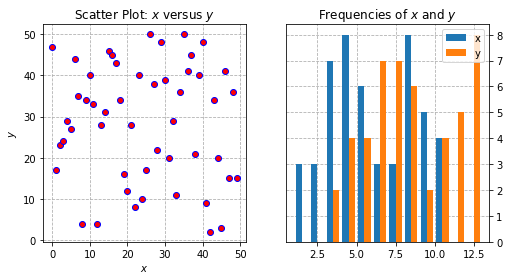

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter Plot: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
# set grid behind data points
ax1.set_axisbelow(True)
ax1.grid(linestyle='--')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
# render in 'best' location
ax2.legend(loc=(0))
ax2.set_title('Frequencies of $x$ and $y$')
# move y axis ticks to right side of plot
ax2.yaxis.tick_right()
ax2.set_axisbelow(True)
ax2.grid(linestyle='--')

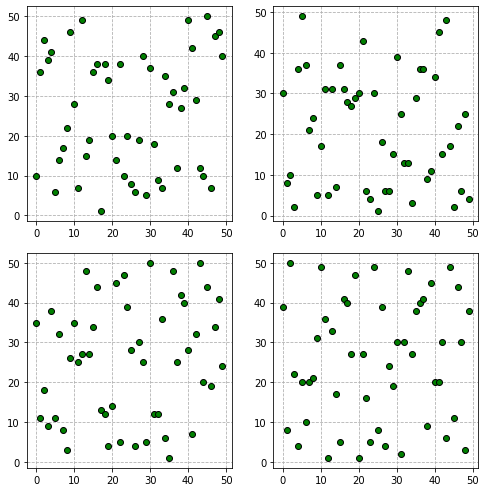

In [108]:
# ax object is numpy array
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        x = np.arange(50)
        y = np.random.randint(1, 51, size=x.size)
        ax[i][j].scatter(x=x, y=y, marker='o', c='g', edgecolor='k')
        ax[i][j].set_axisbelow(True)
        ax[i][j].grid(linestyle='--')

In [86]:
# unpack ax object if desired
ax1, ax2, ax3, ax4 = ax.flatten()
type(ax1)

matplotlib.axes._subplots.AxesSubplot

## Extracting Californina Housing Data

In [91]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'https://ndownloader.figshare.com/files/5976036'
# open URL as a sequence of bytes
decoded = BytesIO(urlopen(url).read())
# target path within data directory
filepath = 'CaliforniaHousing/cal_housing.data'

# unzip tarfile
with tarfile.open(mode='r', fileobj=decoded) as archive:
    # extract as ndarray
    housing = np.loadtxt(archive.extractfile(filepath), delimiter=',')
    # get last element in each line as column vector
    value = housing[:,-1]
    # select only elements 4 and 7 from feature grid
    population, average_age = housing[:, [4, 7]].T
    
print("Value:", value[:5])
print("Population:", population[:5])
print("Average Age:", average_age[:5])

Value: [452600. 358500. 352100. 341300. 342200.]
Population: [ 129. 1106.  190.  235.  280.]
Average Age: [8.3252 8.3014 7.2574 5.6431 3.8462]


## Advanced Plotting

In [104]:
# define function for adding inner title
def inner_title(ax, title):
    ax.text(.5, .8, title,
            horizontalalignment='center',
            # relative to axes dimensions
            transform=ax.transAxes,
            # alpha = opacity
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)

In [97]:
# desired layout == |    ax1    |
#                   |           |
#                   |-----------| 
#                   | ax2 | ax3 | 
#
# height(ax1) = 2 * (height(ax2 & ax3))
#  width(ax1) = 2 *  (width(ax2 & ax3))

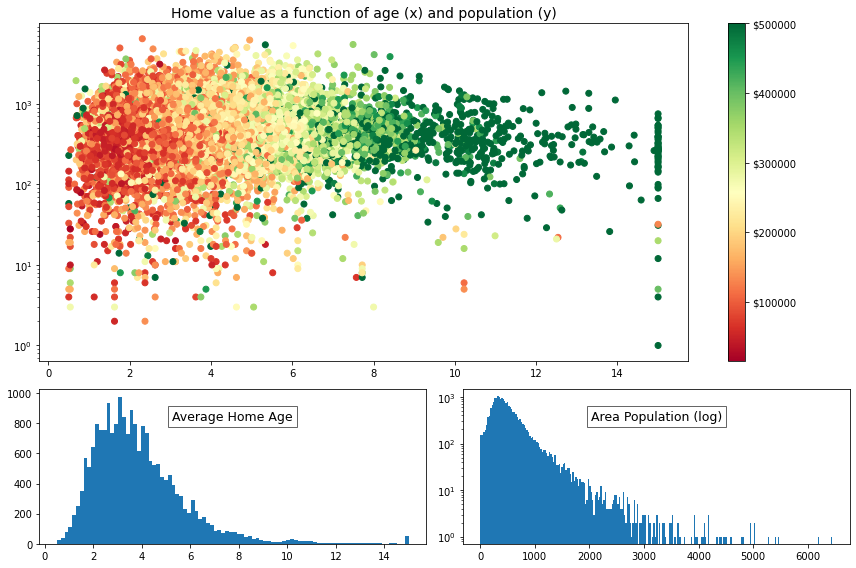

In [111]:
# visual explanation above...
gridsize = (3, 2)

# using figure method to demo subplot2grid method
figure = plt.figure(figsize=(12, 8))

# manually configure axes within figure like table
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

# apply color gradient to scatter plot in ax1
scatter = ax1.scatter(x=average_age, y=population, c=value, cmap='RdYlGn')
plt.colorbar(scatter, ax=ax1, format='$%d')

# display age and population distributions as histograms in ax2 and ax3
ax2.hist(average_age, bins='auto')
ax3.hist(population, bins='auto', log=True)

# other formatting of axes (as desired)
ax1.set_title('Home value as a function of age (x) and population (y)', fontsize=14)
ax1.set_yscale('log')
inner_title(ax2, 'Average Home Age')
inner_title(ax3, 'Area Population (log)')
figure.tight_layout()

## Multiple Figures

In [112]:
# by default, the 'current' figure and its respective axes are the ones most recently created in memory
# figures can be named to allow multiple objects to be stored and manipulated simultaneously

In [146]:
# magic jupyter function to temporarily suppress inline output
# must be called twice if inline function previously declared (weird bug)
# used here to prevent display of empty figure 
%matplotlib agg
%matplotlib agg

fig1, ax1 = plt.subplots()

# fig1's unique id
print(id(fig1))

# id of current figure 
print(id(plt.gcf()))

140650347984376
140650347984376


In [147]:
# define new figure and compare to 'current'
fig2, ax2 = plt.subplots()

# do you need to review bitwise operations? I sure do...
match = id(fig2) & id(plt.gcf())
print("They match! Fig2 is 'current'..." if match else "Something went wrong...")

They match! Fig2 is 'current'...


In [148]:
# define function to collect all figures
def get_all_figs():
    return [plt.figure(i) for i in plt.get_fignums()]

print(get_all_figs())

[<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>]


In [151]:
# close all figures and rerun
plt.close('all')
print(get_all_figs())

[]


## Colored Matrix 

In [189]:
%matplotlib inline

In [190]:
# matplotlib does not have a built-in heatmap method
# define custom method by first importing obscure function
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [191]:
# create diagonal matrix and flip across vertical axis
x = np.diag(np.arange(2, 12))[::-1]
print(x)

[[ 0  0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]]


In [192]:
# add another diagonal line in opposite direction
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
print(x)

[[ 2  0  0  0  0  0  0  0  0 11]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  0  6  7  0  0  0  0]
 [ 0  0  0  5  0  0  8  0  0  0]
 [ 0  0  4  0  0  0  0  9  0  0]
 [ 0  3  0  0  0  0  0  0 10  0]
 [ 2  0  0  0  0  0  0  0  0 11]]


In [193]:
# create second matrix of positional index values
y = np.arange(x.size).reshape(x.shape)
print(y)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [194]:
# create a dict of arguments to give to plotting function
sides = ('left', 'right', 'top', 'bottom')

plot_args = {side: False for side in sides}
plot_args.update({'label%s' % s: False for s in sides})

def print_dictionary(dict):
    [print(key, '-->', value) for (key, value) in dict.items()]
    
print_dictionary(plot_args)

left --> False
right --> False
top --> False
bottom --> False
labelleft --> False
labelright --> False
labeltop --> False
labelbottom --> False


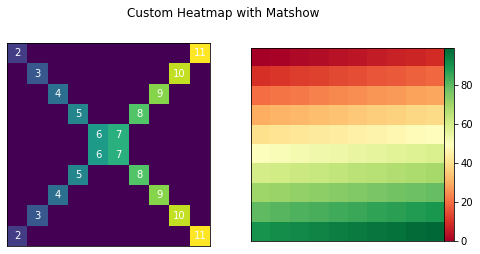

In [196]:
# run context manager - fancy way to temporarily change parameters
with plt.rc_context(rc={'axes.grid':False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle('Custom Heatmap with Matshow')
    
    # plot as grid of colored squares
    ax1.matshow(x)
    heatmap = ax2.matshow(y, cmap='RdYlGn_r')
    for axes in (ax1, ax2):
        # unpack dict created earlier as function parameters
        axes.tick_params(axis='both', which='both', **plot_args)
        
    # make labels for diagonals by collecting coordinates of nonzero entries
    for i, j in zip(*x.nonzero()):
        # coordinates, label, color, alignment
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')
        
    # make colorbar and add to figure
    divider = make_axes_locatable(ax2)
    child_axes = divider.append_axes('right', size='5%', pad=0)
    plt.colorbar(heatmap, cax=child_axes)

# Plotting with Pandas

In [198]:
# pandas plotting methods are mostly just fancy wrappers for matplotlib functions
import pandas as pd

In [199]:
series = pd.Series(np.arange(5), index=list('abcde'))
print(series)

a    0
b    1
c    2
d    3
e    4
dtype: int64


Pandas plot is current axes!


/home/naivoder/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


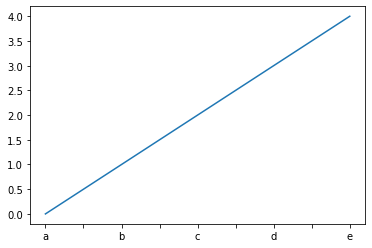

In [202]:
ax = series.plot()

match = id(ax) & id(plt.gca())
print("Pandas plot is current axes!" if match else "Something went wrong...")

## Moving Average of Time Series

In [203]:
import matplotlib.transforms as mtrans

In [205]:
# read in data from csv file 
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'

# arguments to help read dates and remove N/A values
vix = pd.read_csv(url, 
                  index_col=0, 
                  parse_dates=True, 
                  na_values='.', 
                  infer_datetime_format=True,
                  squeeze=True).dropna()

In [207]:
# compute moving average using 90 day window
moving_avg = vix.rolling('90d').mean()
market_state = pd.cut(moving_avg, 
                      bins=[-np.inf, 14, 18, 24, np.inf], 
                      labels=range(4))
print(market_state)

DATE
1990-01-02    1
1990-01-03    1
1990-01-04    2
1990-01-05    2
1990-01-08    2
             ..
2020-08-07    3
2020-08-10    3
2020-08-11    3
2020-08-12    3
2020-08-13    3
Name: VIXCLS, Length: 7712, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


In [208]:
colormap = plt.get_cmap('RdYlGn_r')

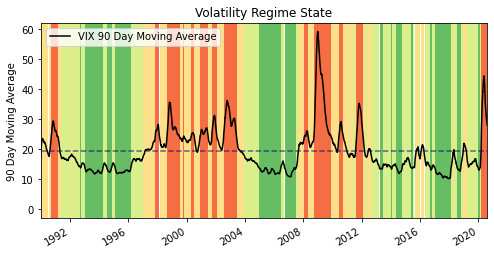

In [215]:
moving_avg.plot(color='black', 
                linewidth=1.5, 
                marker='', 
                figsize=(8,4), 
                label='VIX 90 Day Moving Average')

# grab axes object to apply additional formatting
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('90 Day Moving Average')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper left')
ax.set_xlim(xmin=moving_avg.index[0], xmax=moving_avg.index[-1])

# plot market_state bins as colored bars
trans = mtrans.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(colormap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(moving_avg.index, 0, 1, 
                    where=(state==i),
                    facecolor=color,
                    transform=trans)

# plot mean over time series
ax.axhline(vix.mean(), 
           linestyle='dashed', 
           color='xkcd:darkblue', 
           alpha=0.6, 
           label='Full-period Mean', 
           marker='')

# Style Configuration

In [216]:
# 2 approaches:
# -------------
# matplotlib_rc -> great for sharing with a team
# pyplot rc_params -> great for interacting with plot settings

In [217]:
[attr for attr in dir(plt) if attr.startswith('rc')]

['rc',
 'rcParams',
 'rcParamsDefault',
 'rcParamsOrig',
 'rc_context',
 'rcdefaults',
 'rcsetup']

In [ ]:
# set desired params for 'lines' class
plt.rc('lines', linewidth=2, color='r')

In [218]:
# built in style configurations 
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [219]:
plt.style.use('fivethirtyeight')

[ 7  4  7  6  7 12 13 11 12 13 10 19 21 18 14 22 23 17 27 21]


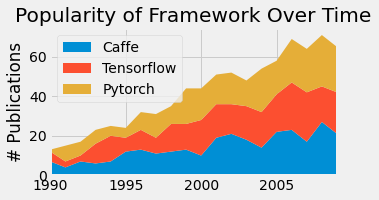

In [238]:
_range = np.arange(20)
_random = np.random.randint(0, 10, size=(3, _range.size))

years = 1990 + _range
growth = _range + _random

start_year, end_year = years[0], years[-1]

print(growth[0])

figure, axes = plt.subplots(figsize=(5,3))

axes.stackplot(years, growth, labels=['Caffe', 'Tensorflow', 'Pytorch'])
axes.set_title('Popularity of Framework Over Time')
axes.legend(loc='upper left')
axes.set_ylabel('# Publications')
axes.set_xlim(xmin=start_year, xmax=end_year)

figure.tight_layout()
# use plt.show() if not in interactive environment